In [1]:
#导入必要的库
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from keras.utils import plot_model

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# 导入数据
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# 输出训练集和测试集的形状信息
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

170498071/170498071 [==============================] - 5s 0us/step
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [3]:
# 将图像数据的像素值缩放到 [0, 1] 的范围
x_train, x_test = x_train / 255.0, x_test / 255.0

# 将标签数据展平，使其变成一维数组
y_train, y_test = y_train.flatten(), y_test.flatten()

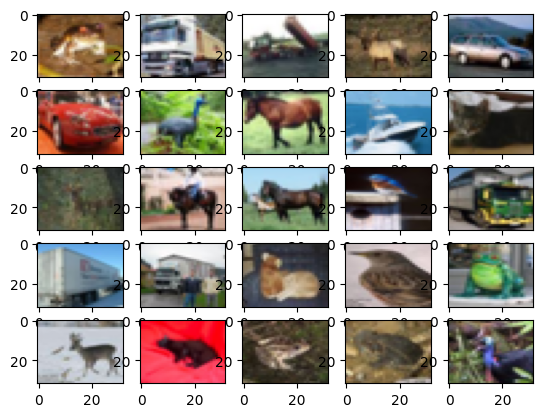

In [4]:
# 创建一个5x5的子图
fig, ax = plt.subplots(5, 5)
k = 0

# 遍历子图并在每个子图中绘制图像
for i in range(5):
    for j in range(5):
        # 使用imshow函数显示图像
        ax[i][j].imshow(x_train[k], aspect='auto')
        k += 1

# 显示绘制的子图
plt.show()

类别数量: 10
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)     

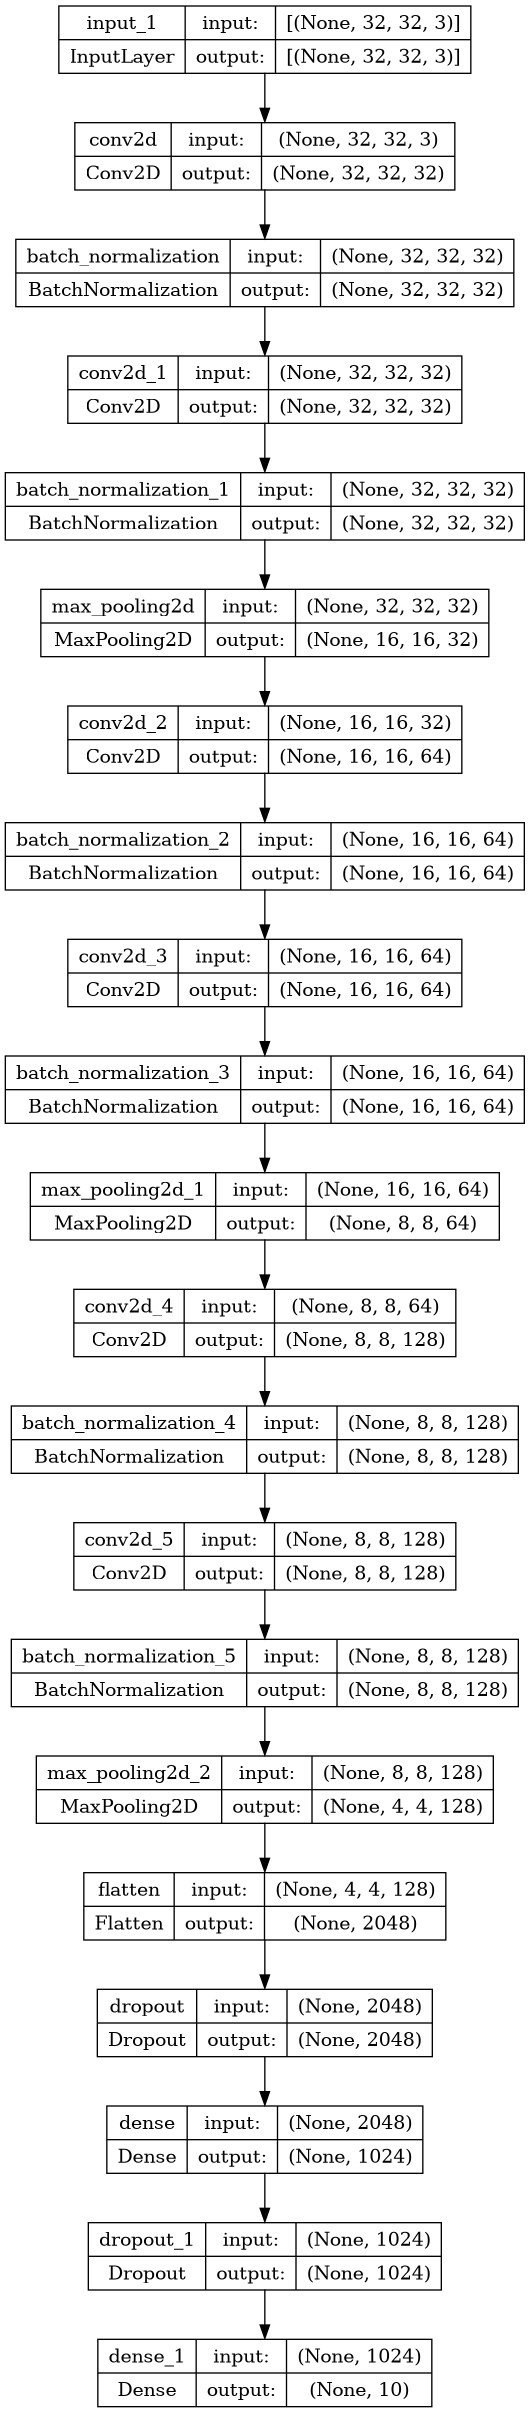

In [5]:
# 类别数量
K = len(set(y_train))

# 计算输出层的总类别数量
print("类别数量:", K)

# 使用功能性API构建模型
# 输入层
i = Input(shape=x_train[0].shape)

# 第一个卷积块
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

# 第二个卷积块
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

# 第三个卷积块
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

# 将卷积输出展平
x = Flatten()(x)
x = Dropout(0.2)(x)

# 隐藏层
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)

# 输出层
x = Dense(K, activation='softmax')(x)

# 创建模型
model = Model(i, x)

# 打印模型概况
model.summary()

# 可视化模型结构并保存为图像文件
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)


In [6]:
# 编译模型
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
# 使用数据增强进行模型训练
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# 指定每批次的样本数量
batch_size = 32

# 创建ImageDataGenerator进行数据增强
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)

# 利用数据生成器创建训练集的生成器
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size

# 运行模型的fit方法，传入数据生成器、验证集数据和回调函数
r = model.fit(train_generator, validation_data=(x_test, y_test),
              steps_per_epoch=steps_per_epoch, epochs=50, callbacks=[EarlyStopping(monitor="val_accuracy", patience=7, verbose=1)])


Epoch 1/50
1562/1562 [==============================] - 38s 20ms/step - loss: 1.4970 - accuracy: 0.4752 - val_loss: 1.2929 - val_accuracy: 0.5649
Epoch 2/50
1562/1562 [==============================] - 29s 19ms/step - loss: 1.0847 - accuracy: 0.6194 - val_loss: 1.1216 - val_accuracy: 0.6248
Epoch 3/50
1562/1562 [==============================] - 29s 18ms/step - loss: 0.9251 - accuracy: 0.6790 - val_loss: 0.8673 - val_accuracy: 0.7109
Epoch 4/50
1562/1562 [==============================] - 29s 19ms/step - loss: 0.8175 - accuracy: 0.7194 - val_loss: 0.8618 - val_accuracy: 0.7072
Epoch 5/50
1562/1562 [==============================] - 29s 19ms/step - loss: 0.7508 - accuracy: 0.7423 - val_loss: 0.8677 - val_accuracy: 0.7195
Epoch 6/50
1562/1562 [==============================] - 30s 19ms/step - loss: 0.7047 - accuracy: 0.7584 - val_loss: 0.8380 - val_accuracy: 0.7364
Epoch 7/50
1562/1562 [==============================] - 29s 19ms/step - loss: 0.6586 - accuracy: 0.7753 - val_loss: 0.7276 -

In [8]:
# 在测试集上评估模型
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


313/313 [==============================] - 1s 3ms/step - loss: 0.4263 - accuracy: 0.8693
Test Accuracy: 86.93%


/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20934 (\N{CJK UNIFIED IDEOGRAPH-51C6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 30830 (\N{CJK UNIFIED IDEOGRAPH-786E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 35757 (\N{CJK UNIFIED IDEOGRAPH-8BAD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 32451 (\N{CJK UNIFIED IDEOGRAPH-7EC3}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/

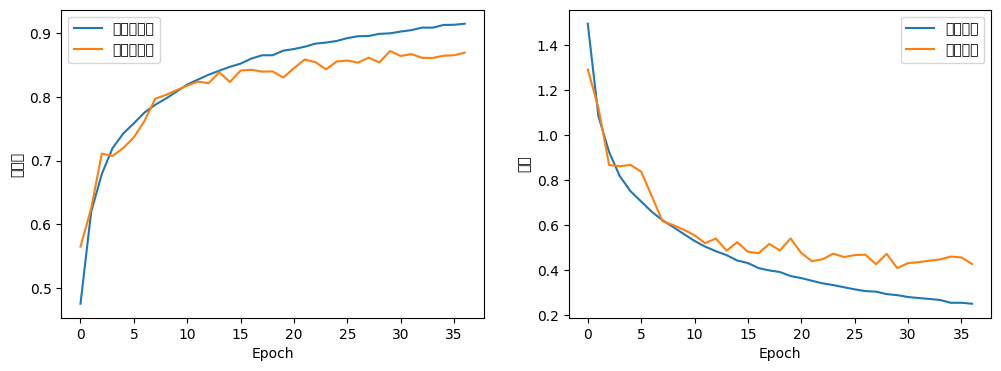

In [9]:
# 绘制训练历史（准确度和损失）
plt.figure(figsize=(12, 4))

# 绘制准确度图像
plt.subplot(1, 2, 1)
plt.plot(r.history['accuracy'], label='训练准确度')
plt.plot(r.history['val_accuracy'], label='验证准确度')
plt.xlabel('Epoch')
plt.ylabel('准确度')
plt.legend()

# 绘制损失图像
plt.subplot(1, 2, 2)
plt.plot(r.history['loss'], label='训练损失')
plt.plot(r.history['val_loss'], label='验证损失')
plt.xlabel('Epoch')
plt.ylabel('损失')
plt.legend()

# 显示图像
plt.show()

1/1 [==============================] - 0s 308ms/step


array([9])

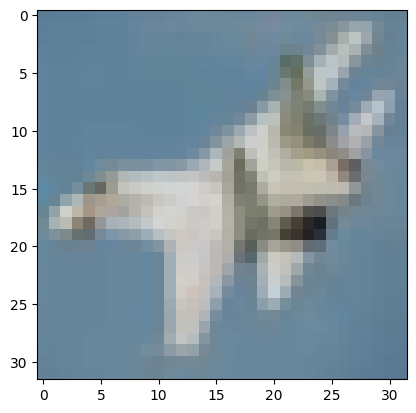

In [10]:
#显示图像
plt.imshow(x_test[10])
#预测结果
model.predict(x_test[10].reshape(1,32, 32, 3)).argmax(axis=1)

In [11]:
# 在测试集上进行预测
predictions = model.predict(x_test)

# 将预测结果转换为类别标签
predicted_labels = np.argmax(predictions, axis=1)

# 生成包含测试样本ID和对应预测标签的DataFrame
result_df = pd.DataFrame({'ID': np.arange(1, len(predicted_labels) + 1), 'Label': predicted_labels})

# 将DataFrame保存为CSV文件
result_df.to_csv('submission.csv', index=False)


313/313 [==============================] - 1s 2ms/step
